In [1]:
#combine files 
import glob 
import os
#clean 
import string
import pandas as pd
import numpy as np
import emoji
import nltk
import re 
from cleantext import clean
#sleep timer 
import time 
import logging
import threading
#show most common words
from collections import Counter
#word cloud 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ninjavan_thailand.csv')
df = df.dropna()

column_titles = ['rating','caption']
df1 = df.reindex(columns=column_titles)
df1

,rating,caption
0,5.0,(Translated by Google) Thank you very much (O...
2,1.0,Always wrong delivery!!! How do you even trai...
3,1.0,(Translated by Google) The delivery man is ver...
4,1.0,(Translated by Google) Please call the recipie...
5,5.0,(Translated by Google) I don't know what other...
...,...,...
922,1.0,(Translated by Google) Terrible staff Delivery...
923,3.0,(Translated by Google) Wait until the product ...
925,5.0,(Translated by Google) Good. Fast delivery. St...
928,5.0,(Translated by Google) Fast delivery and knowi...


In [3]:
df1['middle'] = df1['caption'].str.split(")").str[1] 
df1['Reviews'] = df1['middle'].str.split("(").str[0]

df1 = df1.reset_index()

In [4]:
df1['Reviews'].fillna('0', inplace = True)
for i, row in df1.iterrows(): 
    review = row['Reviews']
    if review == '0':
        df1['Reviews'][i] = review.replace('0', row['caption'])
df1

/var/folders/5w/0kxl7gbj5vqb93sccvkxwrzc0000gn/T/ipykernel_54041/4092710684.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Reviews'][i] = review.replace('0', row['caption'])


,index,rating,caption,middle,Reviews
0,0,5.0,(Translated by Google) Thank you very much (O...,Thank you very much (Original,Thank you very much
1,2,1.0,Always wrong delivery!!! How do you even trai...,NaN,Always wrong delivery!!! How do you even trai...
2,3,1.0,(Translated by Google) The delivery man is ver...,The delivery man is very bad. It's the worst ...,The delivery man is very bad. It's the worst ...
3,4,1.0,(Translated by Google) Please call the recipie...,Please call the recipient and send it to the ...,Please call the recipient and send it to the ...
4,5,5.0,(Translated by Google) I don't know what other...,"I don't know what other people's are, but min...","I don't know what other people's are, but min..."
...,...,...,...,...,...
494,922,1.0,(Translated by Google) Terrible staff Delivery...,Terrible staff Delivery of the front of the h...,Terrible staff Delivery of the front of the h...
495,923,3.0,(Translated by Google) Wait until the product ...,Wait until the product has been designated da...,Wait until the product has been designated da...
496,925,5.0,(Translated by Google) Good. Fast delivery. St...,Good. Fast delivery. Staff speak politely. (...,Good. Fast delivery. Staff speak politely.
497,928,5.0,(Translated by Google) Fast delivery and knowi...,Fast delivery and knowing the route. Reliable...,Fast delivery and knowing the route. Reliable.


### Clean the data

In [5]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

def clean_text_round1(text):
    '''Make text lowercase, remove punctuation, remove words containing numbers and lemmatize/stem.'''
    text = str(text).lower()
    text = re.sub('#\w*', '', text)
    text = re.sub('@\w*', '', text)    
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = clean(text, no_emoji=True)
    text = emoji.demojize(text, delimiters=("", "")) #change emoji into text 
    text = ' '.join([word for word in text.split() if word not in (stop)])
    return text

# Let's take a look at the updated text
df1['Reviews_processed'] = pd.DataFrame(df1['Reviews'].apply(clean_text_round1))
df1

,index,rating,caption,middle,Reviews,Reviews_processed
0,0,5.0,(Translated by Google) Thank you very much (O...,Thank you very much (Original,Thank you very much,thank much
1,2,1.0,Always wrong delivery!!! How do you even trai...,NaN,Always wrong delivery!!! How do you even trai...,always wrong delivery even train staff could e...
2,3,1.0,(Translated by Google) The delivery man is ver...,The delivery man is very bad. It's the worst ...,The delivery man is very bad. It's the worst ...,delivery man bad worst transport
3,4,1.0,(Translated by Google) Please call the recipie...,Please call the recipient and send it to the ...,Please call the recipient and send it to the ...,please call recipient send recipients hand ...
4,5,5.0,(Translated by Google) I don't know what other...,"I don't know what other people's are, but min...","I don't know what other people's are, but min...",dont know peoples mine day received items fast...
...,...,...,...,...,...,...
494,922,1.0,(Translated by Google) Terrible staff Delivery...,Terrible staff Delivery of the front of the h...,Terrible staff Delivery of the front of the h...,terrible staff delivery front house need wait ...
495,923,3.0,(Translated by Google) Wait until the product ...,Wait until the product has been designated da...,Wait until the product has been designated da...,wait product designated date come pass transpo...
496,925,5.0,(Translated by Google) Good. Fast delivery. St...,Good. Fast delivery. Staff speak politely. (...,Good. Fast delivery. Staff speak politely.,good fast delivery staff speak politely
497,928,5.0,(Translated by Google) Fast delivery and knowi...,Fast delivery and knowing the route. Reliable...,Fast delivery and knowing the route. Reliable.,fast delivery knowing route reliable


### Sentiment analysis 


In [6]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
def clean_text_round2(text):
    word_list = nltk.word_tokenize(text)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output
df1['Reviews_processed2'] = pd.DataFrame(df1['Reviews_processed'].apply(clean_text_round2))


In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer() 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
    if sentiment_dict['compound'] >= 0.05 : 
       return "Positive"
    elif sentiment_dict['compound'] <= - 0.05 : 
        return "Negative"
    else : 
       return "Neutral"
        
df1['Sentiment'] = pd.DataFrame(df1['Reviews_processed2'].apply(sentiment_scores))

In [8]:
column_titles = ['rating','Reviews','Sentiment']
df2 = df1.reindex(columns=column_titles)
df2

,rating,Reviews,Sentiment
0,5.0,Thank you very much,Positive
1,1.0,Always wrong delivery!!! How do you even trai...,Negative
2,1.0,The delivery man is very bad. It's the worst ...,Negative
3,1.0,Please call the recipient and send it to the ...,Positive
4,5.0,"I don't know what other people's are, but min...",Neutral
...,...,...,...
494,1.0,Terrible staff Delivery of the front of the h...,Negative
495,3.0,Wait until the product has been designated da...,Neutral
496,5.0,Good. Fast delivery. Staff speak politely.,Positive
497,5.0,Fast delivery and knowing the route. Reliable.,Neutral


In [9]:
df2.to_csv('ninja_th_reviews.csv')

In [10]:
df_neg = df1.drop(df1[df1['Sentiment'] != 'Negative'].index)
df_neg

,index,rating,caption,middle,Reviews,Reviews_processed,Reviews_processed2,Sentiment
1,2,1.0,Always wrong delivery!!! How do you even trai...,NaN,Always wrong delivery!!! How do you even trai...,always wrong delivery even train staff could e...,always wrong delivery even train staff could e...,Negative
2,3,1.0,(Translated by Google) The delivery man is ver...,The delivery man is very bad. It's the worst ...,The delivery man is very bad. It's the worst ...,delivery man bad worst transport,delivery man bad worst transport,Negative
6,7,1.0,(Translated by Google) At first the app said i...,At first the app said it was shipping. Call t...,At first the app said it was shipping. Call t...,first app said shipping call center ask tell w...,first app said shipping call center ask tell w...,Negative
10,12,1.0,Worst company I have dealt with. delay in del...,NaN,Worst company I have dealt with. delay in del...,worst company dealt delay delivery difficulty ...,worst company dealt delay delivery difficulty ...,Negative
11,13,1.0,(Translated by Google) .2 This item is from an...,.2 This item is from another seller...just th...,.2 This item is from another seller...just th...,item another sellerjust wrong postcodebut deli...,item another sellerjust wrong postcodebut deli...,Negative
...,...,...,...,...,...,...,...,...
455,836,5.0,(Translated by Google) Fast delivery. Product ...,Fast delivery. Product is not damaged. (Orig...,Fast delivery. Product is not damaged.,fast delivery product damaged,fast delivery product damaged,Negative
459,844,1.0,(Translated by Google) The delivery was very s...,The delivery was very slow and the item retur...,The delivery was very slow and the item retur...,delivery slow item returned claiming address c...,delivery slow item returned claiming address c...,Negative
471,870,2.0,(Translated by Google) Slow delivery. Take you...,Slow delivery. Take your convenience. Postpon...,Slow delivery. Take your convenience. Postpon...,slow delivery take convenience postpone delive...,slow delivery take convenience postpone delive...,Negative
486,905,5.0,(Translated by Google) The staff speaks very w...,The staff speaks very well. The delivery is f...,The staff speaks very well. The delivery is f...,staff speaks well delivery fast damage ...,staff speaks well delivery fast damage ...,Negative


In [11]:
#combining the text into one long string for word cloud 
cloud_string = df_neg['Reviews_processed2'].str.cat(sep=' ')

In [12]:
# Let's first pull out the top 30 words for each category
words = []
for word in cloud_string.split():
        words.append(word)
Counter(words).most_common()

[('...', 93),
 ('delivery', 55),
 ('bad', 45),
 ('day', 33),
 ('item', 29),
 ('time', 28),
 ('call', 28),
 ('service', 21),
 ('delivered', 19),
 ('cant', 17),
 ('tell', 16),
 ('slow', 16),
 ('send', 15),
 ('contact', 15),
 ('company', 14),
 ('one', 14),
 ('deliver', 13),
 ('didnt', 13),
 ('come', 13),
 ('wait', 13),
 ('good', 13),
 ('product', 13),
 ('staff', 12),
 ('worst', 12),
 ('transport', 12),
 ('said', 12),
 ('customer', 12),
 ('waiting', 12),
 ('dont', 12),
 ('received', 12),
 ('sent', 12),
 ('called', 11),
 ('yet', 11),
 ('say', 10),
 ('number', 10),
 ('recipient', 10),
 ('system', 10),
 ('house', 10),
 ('even', 9),
 ('first', 9),
 ('back', 9),
 ('u', 9),
 ('order', 9),
 ('still', 9),
 ('contacted', 9),
 ('ninja', 9),
 ('ordered', 9),
 ('terrible', 9),
 ('wrong', 8),
 ('address', 8),
 ('today', 8),
 ('shop', 8),
 ('poor', 8),
 ('arrived', 8),
 ('van', 8),
 ('fast', 8),
 ('employee', 8),
 ('receive', 7),
 ('status', 7),
 ('thing', 7),
 ('broken', 7),
 ('next', 7),
 ('really', 7

In [13]:
#add meaningless words to stopwords
add_stop_words = ['...' , 'package', 'even', 'use','call','one','though', 'didnt', 'dont', 'hasnt', 'c',]
stop_words = add_stop_words + stop 

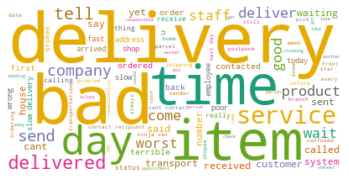

In [14]:
#wordcloud for top 100 words 
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42, max_words = 100)

wordcloud = wc.generate(cloud_string)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

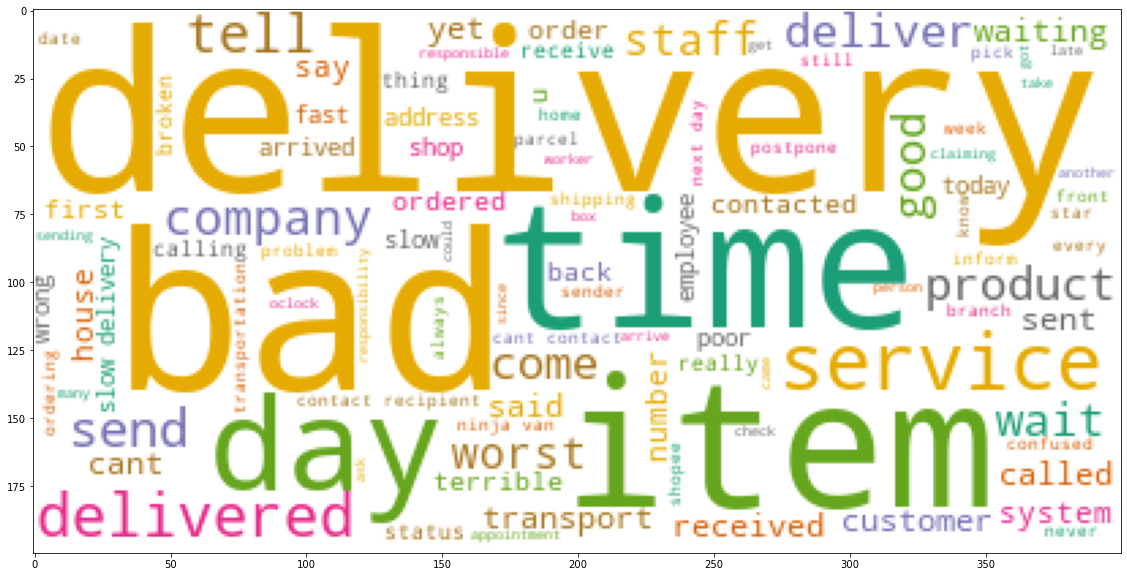

In [15]:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)

In [16]:
late_words = ['slow', 'late', 'long']
df_late = df_neg[df_neg['Reviews_processed2'].str.contains('|'.join(late_words))]
df_late = df_late.rename(columns ={'Reviews_processed2':'Late reviews'})

In [19]:
column_titles = ['rating','Reviews','Sentiment']
df_late = df_late.reindex(columns=column_titles)
df_late

,rating,Reviews,Sentiment
18,2.0,Order online from the shop and deliver with t...,Negative
20,1.0,"Waiting for the parcel for a long time, the s...",Negative
33,1.0,Sucks. Slow delivery. Pickled items. No deliv...,Negative
36,1.0,"Pickled items are very good, don't send items...",Negative
45,1.0,"Too bad, too long, ineffective irresponsible ...",Negative
48,1.0,"Very slow delivery, it will be ruined soon",Negative
50,1.0,"Very slow, send it, don't call Items can't be...",Negative
58,1.0,"Very bad service, ordering a lot of things, c...",Negative
63,1.0,"Very slow delivery, said that I pressed the w...",Negative
67,1.0,"Slow delivery, wait until you're discouraged",Negative


In [20]:
df_late.to_csv('Late_reviews_ninjath.csv')